In [7]:
import numpy as np
from PIL import Image

# Built-in modules
import os
import json
import datetime as dt
from typing import Tuple, List

# Basics of Python data handling and visualization
import numpy as np
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from tqdm.auto import tqdm

# Module for GeoDB
from xcube_geodb.core.geodb import GeoDBClient

# Imports from eo-learn and sentinelhub-py
from sentinelhub import CRS, BBox, SHConfig, DataCollection

from eolearn.core import (FeatureType,
                          EOPatch, 
                          EOTask, 
                          LinearWorkflow, 
                          EOExecutor, 
                          LoadTask,
                          SaveTask)
from eolearn.io import GeoDBVectorImportTask, SentinelHubInputTask
from eolearn.geometry import VectorToRaster

# Visualisation utilities from utils.py
import sys
sys.path.append('./ai4eo/')
from ai4eo.utils import get_extent, md5_encode_files

In [8]:
tiffdir = '/work/ka1176/caroline/gitlab/ai4eo-challenge/ai4eo/submission_wkn_TV/'

In [9]:
import os

In [22]:
scl_dict =  {
    0: [0, 0, 0],  # no data
    1: [1, 0, 0.016],  # saturated / defected
    2: [0.525, 0.525, 0.525],  # dark area pixels
    3: [0.467, 0.298, 0.043],  # cloud shadows
    4: [0.063, 0.827, 0.176],  # vegetation
    5: [1, 1, 0.325],  # bare soils
    6: [0, 0, 1],  # water
    7: [0.506, 0.506, 0.506],  # clouds low probability / unclassified 
    8: [0.753, 0.753, 0.753],  # clouds medium probability
    9: [0.949, 0.949, 0.949],  # clouds high probability
    10: [0.733, 0.773, 0.925],  # cirrus
    11: [0.325, 1, 0.980]  # ice / snow
}

In [11]:
from matplotlib import pyplot as plt
%matplotlib inline

IndexError: index 25 is out of bounds for axis 0 with size 25

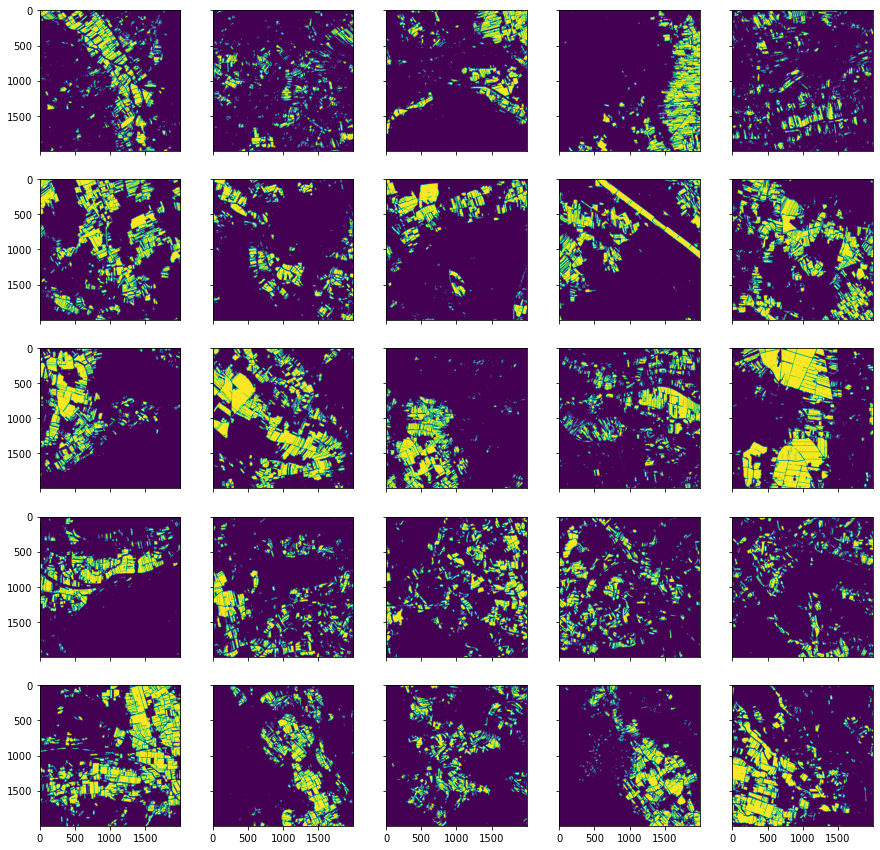

In [12]:
fig, ax = plt.subplots(5, 5, sharex=True, sharey=True, figsize=[15, 15])
ax = ax.flatten()

for i,sm in enumerate(np.sort(os.listdir(tiffdir))):
    img = Image.open(os.path.join(tiffdir, sm))
    x = np.array(img)
    ax[i].imshow(x)


In [13]:
path = "/work/ka1176/shared_data/2021-ai4eo/eopatches/train/"
i = 731
eopatch = EOPatch.load(os.path.join(path, f'eopatch-{i:02d}'))

img = Image.open(os.path.join(tiffdir, f'eopatch-{i:02d}.tif'))
x_img = np.array(img)

Red: False positive (predicted cultivated land where there was none)
Blue: False negative (failed to predict cultivated land)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


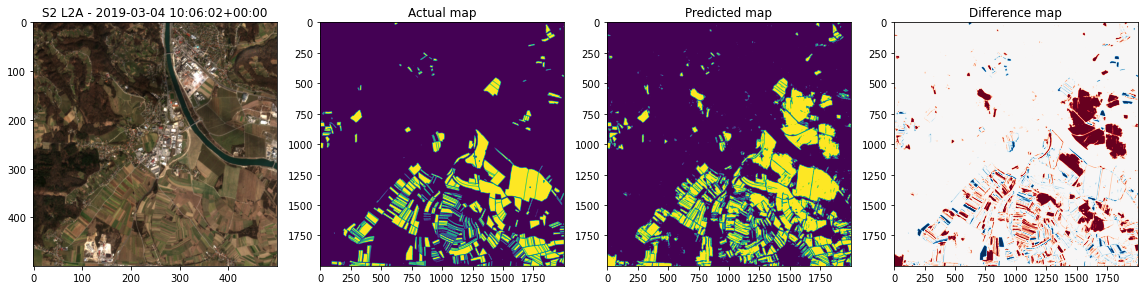

In [14]:
# choose one time index from [0..37] to visualise
tidx = 1

vis_factor = 3.5

norm_factor = eopatch.scalar['NORM_FACTORS'][tidx]

fig, axs = plt.subplots(figsize=(16, 4), ncols=4)

axs[0].imshow(vis_factor * norm_factor * eopatch.data['BANDS'][tidx][..., [3, 2, 1]])
axs[0].set_title(f'S2 L2A - {eopatch.timestamp[tidx]}')

y = eopatch.mask_timeless['CULTIVATED'].squeeze()
z = x_img.astype(int) - y.astype(int)


axs[1].imshow(y)
axs[1].set_title('Actual map')

axs[2].imshow(x_img)
axs[2].set_title('Predicted map')

axs[3].imshow(z, cmap='RdBu_r')
axs[3].set_title('Difference map')

fig.tight_layout()

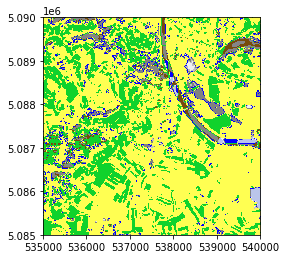

In [23]:
plt.imshow(eopatch.mask['SCL'][tidx].squeeze(), 
              extent=get_extent(eopatch), 
              cmap=ListedColormap([np.array(v) for v in scl_dict.values()]),
              vmin=0, vmax=11)